<p style="font-family: Arial; font-size:3em;color:green; font-style:bold"><br>
BCIS5110 Assignment 8
</p><br>

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset is about NFL player injuries. Import two data tables: InjuryRecord.csv and PlayList.csv.

In [20]:
injury = pd.read_csv('/content/InjuryRecord.csv')
play = pd.read_csv('/content/PlayList.csv')

1) Check the basic information of the two tables. How many observations for each table?

In [21]:
injury.info()
play.info()

# injury = 105
# play = 267005

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null    object
 5   DM_M1      105 non-null    int64 
 6   DM_M7      105 non-null    int64 
 7   DM_M28     105 non-null    int64 
 8   DM_M42     105 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267005 entries, 0 to 267004
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PlayerKey       267005 non-null  int64 
 1   GameID          267005 non-null  object
 2   PlayKey         267005 non-null  object
 3   RosterPosition  267005 non-null  object
 4   PlayerDay       267005 non-null

2) How many missing values for each variable?

In [22]:
injury.isnull().sum()
play.isnull().sum()

,0
PlayerKey,0
GameID,0
PlayKey,28
BodyPart,0
Surface,0
DM_M1,0
DM_M7,0
DM_M28,0
DM_M42,0


,0
PlayerKey,0
GameID,0
PlayKey,0
RosterPosition,0
PlayerDay,0
PlayerGame,0
StadiumType,16910
FieldType,0
Temperature,0
Weather,18691


3) Drop three variables from PlayList table: 'PlayerDay', 'PlayerGame', 'PlayerGamePlay' and 'StadiumType'.

In [23]:
play = play.drop(['PlayerDay', 'PlayerGame', 'PlayerGamePlay', 'StadiumType'], axis=1)
play.head()

,PlayerKey,GameID,PlayKey,RosterPosition,FieldType,Temperature,Weather,PlayType,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,Synthetic,63,Clear and warm,Pass,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,Synthetic,63,Clear and warm,Pass,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,Synthetic,63,Clear and warm,Rush,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,Synthetic,63,Clear and warm,Rush,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,Synthetic,63,Clear and warm,Pass,QB,QB


4) a. Check the unique values of 'PositionGroup'. What do you observe? Count the number of records with 'Missing Data'.

In [24]:
play['PositionGroup'].unique()
play['PositionGroup'].value_counts()

# there are 9 unique values.
# DB has the highest count.
# there are 45 missing data.

array(['QB', 'Missing Data', 'WR', 'LB', 'RB', 'DL', 'TE', 'DB', 'OL',
       'SPEC'], dtype=object)

,count
PositionGroup,
DB,68295
LB,50954
OL,47409
WR,43387
DL,29830
RB,11659
TE,7749
QB,6969
SPEC,708


b. We need to replace 'Missing data' with missing value sign. Hint: use .replace(), not str.replace(). Missing value is represented with np.nan. np is Numpy.

In [25]:
play['PositionGroup'] = play['PositionGroup'].replace('Missing Data', np.nan)

5) Check the unique values of Temperature. We need to replace -999 with missing value sign too.

In [26]:
play['Temperature'].unique()
play['Temperature'].info()
play['Temperature'] = play['Temperature'].replace(-999, np.nan)

array([  63,   85,   84,   61,   76,   73,   56,   62,   48,   66,   47,
         55,   42,   35,   13,   97,   68,   65,   45,   44,   46,   40,
         54,   53,   82,   33,   70,   52,   79,   57,   72,   69, -999,
         67,   71,   86,   90,   77,   39,   78,   60,   50,   43,   74,
         34,   89,   23,   92,   75,   81,   36,   88,   49,   80,   22,
         87,   58,   16,   51,   64,   83,   41,   29,   19,   91,   38,
         25,   17,   28,   10,   37,   31,   11,   32,    9,   59,   24,
         27,   26])

<class 'pandas.core.series.Series'>
RangeIndex: 267005 entries, 0 to 267004
Series name: Temperature
Non-Null Count   Dtype
--------------   -----
267005 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


6) Check the values of variable 'Weather'. What do you observe? We need to clean it.

In [27]:
play['Weather'].unique()
print('\n\n')
play['Weather'].info()

# There are various weather conditions, some with inconsistencies (e.g., multiple spaces, slight variations in wording).
# yes, we need to clean it.

array(['Clear and warm', 'Mostly Cloudy', 'Sunny', 'Clear', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter', 'Rain',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Rain Chance 40%', 'Controlled Climate',
       'Sunny and warm', 'Partly cloudy', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Indoor', nan, 'Partly Sunny',
       'N/A (Indoors)', 'Mostly Sunny', 'Indoors', 'Clear Skies',
       'Partly sunny', 'Showers', 'N/A Indoor', 'Sunny and clear', 'Snow',
       'Scattered Showers', 'Party Cloudy', 'Clear skies',
       'Rain likely, temps in low 40s.', 'Hazy', 'Partly Clouidy',
       'Sunny Skies', 'Overcast', 'Cloudy, 50% change of rain', 'Fair',
       'Light Rain', 'Partly clear', 'Mostly Coudy', '10% Chance of Rain',
       'Cloudy, chance of rain', 'Heat Index 95',
       'Sunny, highs to upper 80s', 'Sun & clouds',
       'Heavy lake effect snow', 'Mostly sunny', 'Cloudy, Rain',
       'Sunny, Windy', '




<class 'pandas.core.series.Series'>
RangeIndex: 267005 entries, 0 to 267004
Series name: Weather
Non-Null Count   Dtype 
--------------   ----- 
248314 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


a. For instance, the condition 'Indoor' has four variations: 'Indoors',  'N/A (Indoors)', 'N/A (Indoor)' and 'Controlled Climate'. They can all be transformed to 'Indoor'.

In [28]:
play['Weather'] = play['Weather'].replace(['Indoor', 'Indoors', 'N/A Indoors', 'N/A Indoor','N/A (Indoors)', 'controlled climate'], 'Indoor')

b. Similarly, 'Cloudy' has different variations, even with spelling mistakes. To simplify, we tranform all values with 'Cloudy' in it (including those with spelling errors), the ones with rain chance, 'Sun & clouds' and 'Cloudy, Rain' to 'Cloudy'. You can just do it in a tedious way.

In [29]:
play['Weather'] = play['Weather'].replace(['Sun & clouds',  'Cloudy, Rain', 'Cloudy', 'Overcast','Mostly Cloudy','Coudy','Mostly Coudy','Partly Clouidy',
                                           'Mostly cloudy', 'Partly cloudy','Partly Cloudy','Cloudy and cold', 'Clear to Partly Cloudy','Cloudy and Cool',
                                           'Cloudy, 50% change of rain', 'Party Cloudy','Cloudy, light snow accumulating 1-3"','Cloudy, fog started developing in 2nd quarter',
                                           'Cloudy, chance of rain', 'cloudy'], 'Cloudy')

c. Similarly, any variation with 'Sunny' or 'Clear' in it, transform it to 'Clear'. The value 'Clear to Partly Cloudy' has been transformed to 'Cloudy' in last step. We can leave it that way.

In [30]:
play['Weather'] = play['Weather'].replace(['Sunny','Clear and warm', 'Clear', 'Clear and Sunny', 'Sun','Partly sunny', 'Clear skies', 'Sunny Skies',
                                           'Partly clear','Clear and Cool', 'Clear and cold','Sunny and clear','Mostly Sunny Skies', 'Mostly sunny', 'Sunny and cold','Sunny and warm',
                                           'Partly Sunny','Sunny, Windy', 'Clear and sunny','Heat Index 95', 'Clear Skies','Sunny, highs to upper 80s', 'Mostly Sunny'], 'Clear')

d. Similarly, 'Rainy', "Rain shower', 'Light Rain', 'Showers' can all be transformed to 'Rain'.

In [31]:
play['Weather'] = play['Weather'].replace(['Rain', 'Rainy', 'Light Rain', 'showers', 'light drizzle','Showers','Rain shower','Scattered Showers'], 'Rain')

In [32]:
play['Weather'].value_counts()

,count
Weather,
Cloudy,112758
Clear,95586
Indoor,13921
Rain,12298
Controlled Climate,6355
Fair,2218
Hazy,1043
Snow,946
Rain Chance 40%,691


7) Merge the two tables using inner merge on 'PlayerKey', 'GameID', and 'PlayKey'.

In [33]:
main_df = pd.merge(injury, play, on=['PlayerKey', 'GameID', 'PlayKey'], how='inner')
main_df.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,RosterPosition,FieldType,Temperature,Weather,PlayType,Position,PositionGroup
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1,Linebacker,Synthetic,84.0,Cloudy,Punt,OLB,LB
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0,Linebacker,Natural,76.0,Cloudy,Punt,OLB,LB
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1,Safety,Synthetic,63.0,Clear,Pass,SS,DB
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0,Linebacker,Natural,80.0,Cloudy,Punt,LB,LB
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1,Wide Receiver,Synthetic,89.0,Cloudy,Kickoff,WR,WR


8) Using the merged table, make a bar chart to show the number of injuries in each BodyPart.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='BodyPart'>

Text(0.5, 1.0, 'Number of Injuries per Body Part')

Text(0.5, 0, 'Body Part')

Text(0, 0.5, 'Number of Injuries')

(array([0, 1, 2]),
 [Text(0, 0, 'Knee'), Text(1, 0, 'Ankle'), Text(2, 0, 'Foot')])

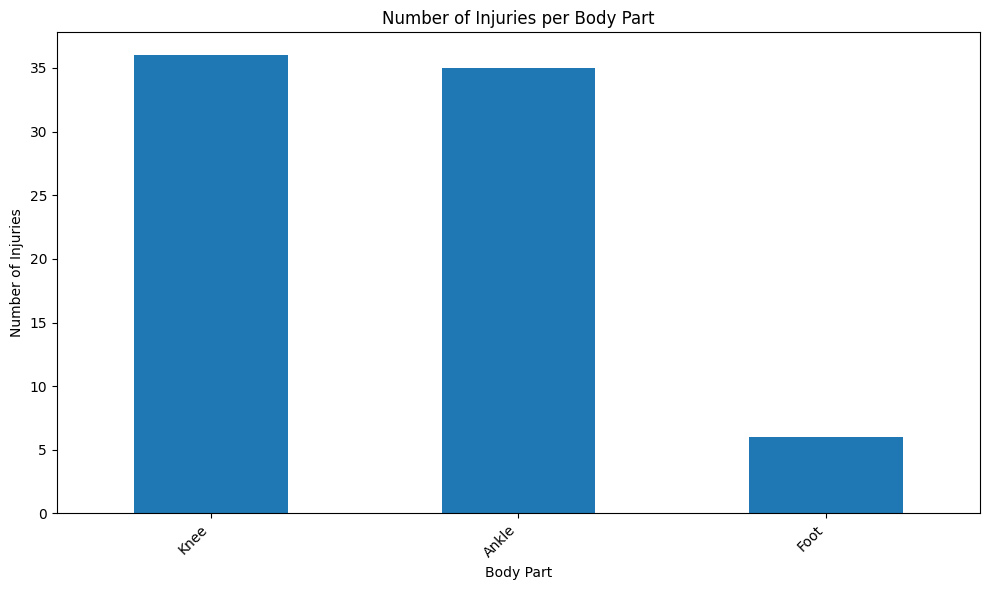

In [34]:
bodypart_counts = main_df['BodyPart'].value_counts()
plt.figure(figsize=(10, 6))
bodypart_counts.plot(kind='bar')
plt.title('Number of Injuries per Body Part')
plt.xlabel('Body Part')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()